In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
df=pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2931,ham,Only 2% students solved this CAT question in '...,NaN,NaN,NaN
4847,ham,S.this will increase the chance of winning.,NaN,NaN,NaN
3112,ham,"Wat time liao, where still got.",NaN,NaN,NaN
2463,ham,"Good afternoon, babe. How goes that day ? Any ...",NaN,NaN,NaN
3995,ham,We'll you pay over like &lt;#&gt; yrs so its ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1.Data cleaning
#2.EDA
#3.Text preprocessing
#4.Model building
#5.Evaluation
#6.Improvement
# 7.website
# 8.display

1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#Drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2767,ham,Wow v v impressed. Have funs shopping!
1564,ham,Tmrw. Im finishing 9 doors
1755,ham,Really good:)dhanush rocks once again:)
3633,ham,Its a big difference. &lt;#&gt; versus &lt;...
2858,ham,Do you know why god created gap between your f...


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
4093,ham,how are you? I miss you!
297,ham,Hurt me... Tease me... Make me cry... But in t...
950,ham,"Awesome, lemme know whenever you're around"
4016,ham,Eek that's a lot of time especially since Amer...
983,ham,LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.sample(20)

,target,text
3168,0,"Haven't seen my facebook, huh? Lol!"
1827,0,Hey gorgeous man. My work mobile number is. Ha...
4896,0,I cant pick the phone right now. Pls send a me...
1020,0,Good afternoon on this glorious anniversary da...
1412,0,"Wen ur lovable bcums angry wid u, dnt take it ..."
1676,0,"Yeah, that's fine! It's å£6 to get in, is that..."
1887,1,Urgent! Please call 09061743811 from landline....
486,1,FREE MESSAGE Activate your 500 FREE Text Messa...
5118,0,Are you driving or training?
2151,0,I surely dont forgot to come:)i will always be...


In [15]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
# Remove duplicates
df=df.drop_duplicates(keep="first")

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

# 2.EDA Exploratory data analysis

In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

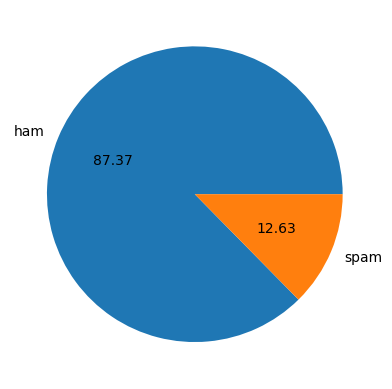

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
#Data is imbalanced
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [24]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [25]:
df['num_characters']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [28]:
df[df['target']==0]

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
6,0,Even my brother is not like to speak with me. ...,77
...,...,...,...
5565,0,Huh y lei...,12
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [29]:
# number of words
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
df[df['target']==0][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
df[df['target']==1][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

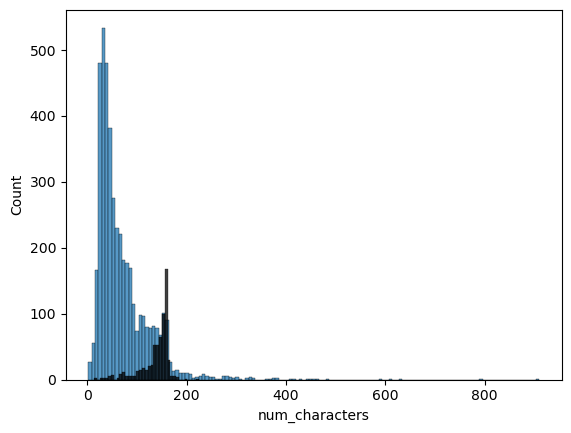

In [37]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='black')

<Axes: xlabel='num_word', ylabel='Count'>

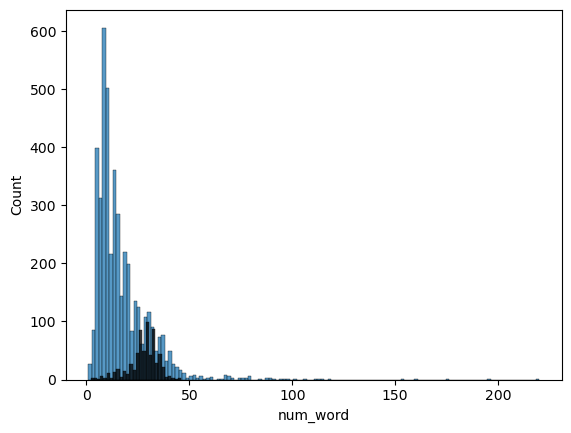

In [38]:
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='black')

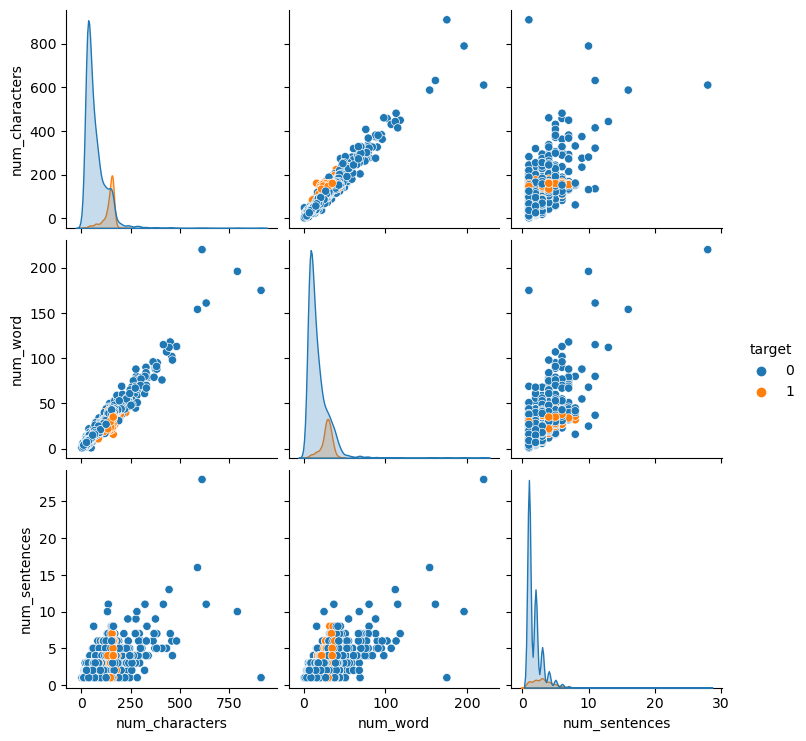

In [39]:
sns.pairplot(df,hue='target')

In [46]:
df.corr()

C:\Users\home\AppData\Local\Temp\ipykernel_1464\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_word,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_word,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


C:\Users\home\AppData\Local\Temp\ipykernel_1464\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

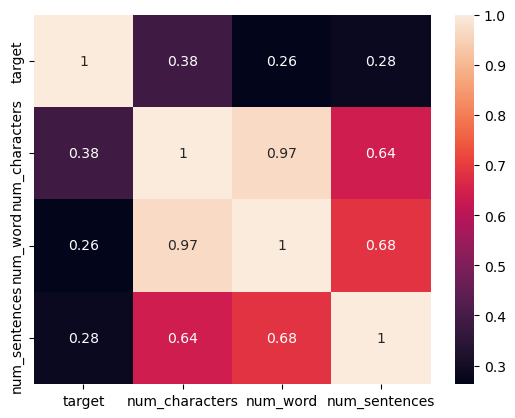

In [47]:
sns.heatmap(df.corr(),annot=True)

# 3.Data Preprocessing
.lowercase
.tokenization
.removing special characters
removing stop words and punctuation
.stemming


In [48]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
#Removing special charcters
#Removing stop words
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
   

In [50]:
transform_text('did you liked my presentation!? of lml')

NameError: name 'ps' is not defined

In [51]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [52]:
df['transformed_text']=df['text'].apply(transform_text)

In [164]:
df.head()

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [165]:

from wordcloud import  WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [166]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

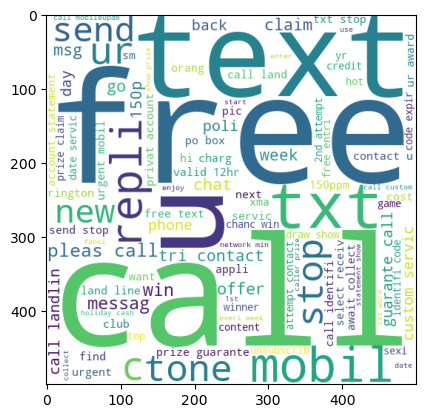

In [167]:
plt.imshow(spam_wc)

In [168]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

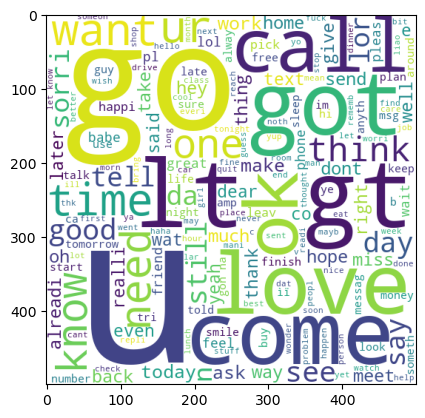

In [169]:
plt.imshow(ham_wc)

In [170]:
df['target']==1

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: target, Length: 5169, dtype: bool

In [171]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [172]:
len(spam_corpus)

9939

In [173]:
#Not working
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

# 4.Model Building

In [174]:
df.head()

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [188]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [189]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [190]:
X.shape

(5169, 3000)

In [191]:
y=df['target'].values

In [192]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [194]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [195]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [196]:
gnb.fit(x_train,y_train)#Not good
y_pred1=gnb.predict(x_test)
accuracy_score(y_test,y_pred1)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[1202  158]
 [  40  151]]
0.4886731391585761


In [197]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
accuracy_score(y_test,y_pred2)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9819471308833011
[[1358    2]
 [  26  165]]
0.9880239520958084


In [198]:
mnb.fit(x_train,y_train)#best
y_pred3=mnb.predict(x_test)
accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9716312056737588
[[1360    0]
 [  44  147]]
1.0


In [199]:
#Many classifiers were user for checking which one has performed best
#naivebayes has the highest precision among all
#Scalling is also done

In [200]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))